# Code Appendix
Code for the study of a double quantum well system, a model used in particular to describe the inversion of the ammonia molecule (NH3)

# 1. Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.optimize import brentq
from scipy import special

# 2. Setup parameters

In [ ]:
# Physical constants (normalized units where ℏ = m = 1)
hbar = 1.0
m = 1.0
two_m = 1.0

# Well geometry parameters (as defined in the report)
a = 1.0          # Width of each individual well
b = 1.0          # Distance from origin to center of each well
Delta = 2*b - a  # Width of the central barrier (Δ = 2b - a)

# Region boundaries
x_L_start = -b - a/2  # Left well: from -b-a/2 to -b+a/2
x_L_end = -b + a/2
x_R_start = b - a/2   # Right well: from b-a/2 to b+a/2
x_R_end = b + a/2
x_barrier_start = x_L_end   # Barrier: from -b+a/2 to b-a/2
x_barrier_end = x_R_start

# Potential parameters
V0 = 12.0  # Finite barrier height (in units of E_1)
V_outer = 1.5 * V0

# Spatial grid for all visualizations
x_min, x_max = -2.5, 2.5
n_points = 1000
x = np.linspace(x_min, x_max, n_points)

# Harmonized color scheme (matching your existing plots)
color_well = 'blue'
color_barrier = 'orange'
color_psi = 'darkblue'
color_symmetric = 'green'
color_antisymmetric = 'purple'
color_left = 'cyan'
color_right = 'magenta'
color_potential = 'black'

# 3. Functions to solve different problems

In [ ]:
def in_interval(xv, x0, x1):
    return (xv >= x0) & (xv <= x1)


# Infinite single well eigenfunction (well from 0 to L, shifted to center at xc)
def infinite_well_wave(n, L, x_grid, x0=0.0):
    # well domain is [x0, x0+L]
    psi = np.zeros_like(x_grid)
    mask = (x_grid >= x0) & (x_grid <= x0 + L)
    # normalized eigenfunction
    psi[mask] = np.sqrt(2.0 / L) * np.sin(n * np.pi * (x_grid[mask] - x0) / L)
    return psi


# Build localized wavefunctions for infinite double well (left/right)
def localized_infinite(n=1):
    # left well from x_L_start to x_L_end, right well from x_R_start to x_R_end
    phi_L = infinite_well_wave(n, a, x, x0=x_L_start)
    phi_R = infinite_well_wave(n, a, x, x0=x_R_start)
    return phi_L, phi_R


# Build symmetric/antisymmetric combinations (infinite case with degenerate energies)
def psi_S_A_infinite(n=1):
    phi_L, phi_R = localized_infinite(n)
    psi_S = (phi_R + phi_L) / np.sqrt(2.0)
    psi_A = (phi_R - phi_L) / np.sqrt(2.0)
    # normalize (numerical)
    psi_S /= np.sqrt(np.trapz(np.abs(psi_S)**2, x))
    psi_A /= np.sqrt(np.trapz(np.abs(psi_A)**2, x))
    return psi_S, psi_A, phi_L, phi_R


# Finite double well *model* wavefunctions for visualization (semi-analytic toy model)
# This is similar to the code used in the report for qualitative images.


def finite_double_model(k_val, K_val, kind='symmetric'):
    # returns psi evaluated on x for an eigenstate of given parity
    psi = np.zeros_like(x)
    # left well sin(k*(x - x_L_start))
    mask_L = in_interval(x, x_L_start, x_L_end)
    psi[mask_L] = np.sin(k_val * (x[mask_L] - x_L_start))
    # barrier: cosh / sinh depending on parity
    mask_barrier = in_interval(x, x_barrier_start, x_barrier_end)
    if kind == 'symmetric':
        # Cosh shape
        cosh_amp = np.sin(k_val * a) / np.cosh(K_val * x_barrier_start)
        psi[mask_barrier] = cosh_amp * np.cosh(K_val * x[mask_barrier])
    else:
        sinh_amp = -np.sin(k_val * a) / np.sinh(K_val * x_barrier_start)
        psi[mask_barrier] = sinh_amp * np.sinh(K_val * x[mask_barrier])
    # right well
    mask_R = in_interval(x, x_R_start, x_R_end)
    psi[mask_R] = np.sin(k_val * (x_R_end - x[mask_R]))
    # normalize
    psi /= np.sqrt(np.trapz(psi**2, x))
    return psi

In [ ]:
def get_potential_profile(x_grid, kind='finite', v_height=V0):
    """Returns V(x) array for plotting."""
    V = np.zeros_like(x_grid)

    # Define well regions (V=0)
    in_left_well = (x_grid >= x_L_start) & (x_grid <= x_L_end)
    in_right_well = (x_grid >= x_R_start) & (x_grid <= x_R_end)

    # Everything else is V0 (or high value for infinite)
    mask_outside = ~(in_left_well | in_right_well)


    if kind == 'finite':
        V = np.full_like(x_grid, V_outer) # Default to outer high potential

        # Left Well (V=0)
        mask_L = (x_grid >= x_L_start) & (x_grid <= x_L_end)
        V[mask_L] = 0

        # Right Well (V=0)
        mask_R = (x_grid >= x_R_start) & (x_grid <= x_R_end)
        V[mask_R] = 0

        # Central Barrier (V=V0)
        mask_Barrier = (x_grid > x_L_end) & (x_grid < x_R_start)
        V[mask_Barrier] = V0
        # For visualization of infinite potential, use a value higher than the wave peak
    else:
        V[mask_outside] = v_height*1.5

    return V

# Plots

## Image 1

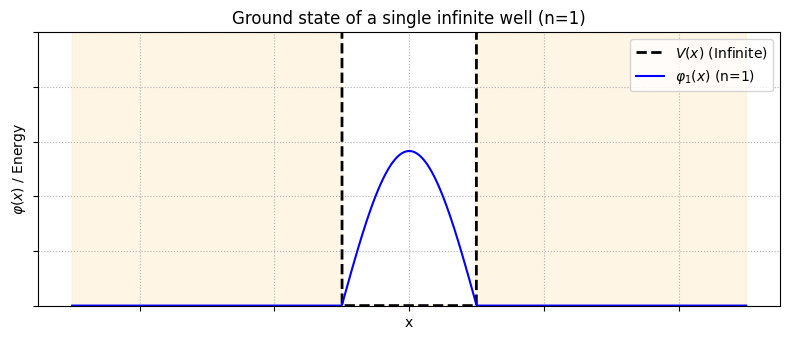

<Figure size 640x480 with 0 Axes>

In [ ]:
L = a
xc = -0.5
x0 = xc
psi1 = np.zeros_like(x)
# Infinite well wavefunction logic
mask = (x >= x0) & (x <= x0 + L)
psi1[mask] = np.sqrt(2.0 / L) * np.sin(1 * np.pi * (x[mask] - x0) / L)

# Potential for Single Infinite Well (Visual)
V_single = np.ones_like(x) * 20.0 # Arbitrary height for visual
V_single[mask] = 0

plt.figure(figsize=(8,3.5))

# Plot Potential
plt.plot(x, V_single, color=color_potential, linestyle='--', linewidth=2, label=r'$V(x)$ (Infinite)')
plt.fill_between(x, V_single, color=color_barrier, alpha=0.1)

# Plot Wavefunction
plt.plot(x, psi1, label=r'$\varphi_1(x)$ (n=1)', color='blue')

plt.title('Ground state of a single infinite well (n=1)')
plt.xlabel('x')
plt.ylabel(r'$\varphi(x)$ / Energy')
plt.ylim(0, 2.5) # Limit y to make potential look like walls
plt.tick_params(
    axis='both',
    which='both',
    bottom=True,
    left=True,
    labelbottom=False,
    labelleft=False
)
plt.legend(loc='upper right')
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()

plt.savefig('Image_1.png', dpi=300)

## Image 2

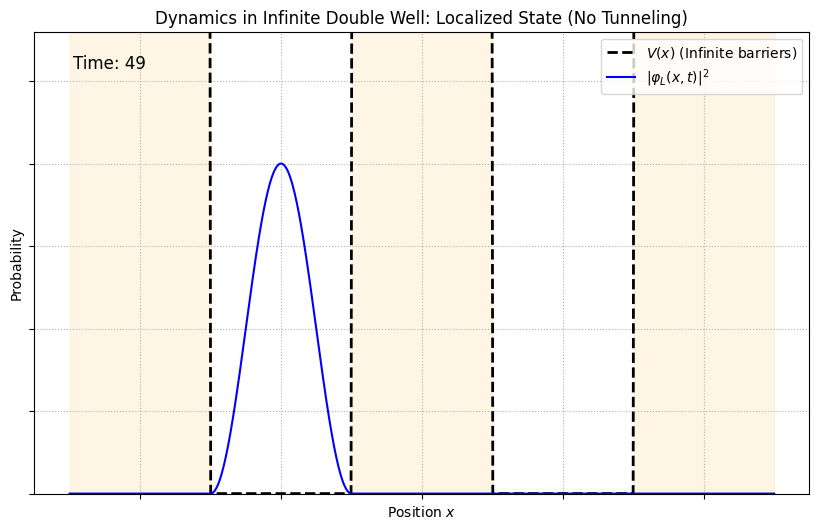

In [ ]:
# --- Image 2: Infinite Double Well Dynamics ---
# Unlike the finite case, the barrier is infinite.
# The localized state phi_L is an exact eigenstate of the Hamiltonian.
# Therefore, |phi_L(t)|^2 does not change. There is NO Tunneling.

# Setup states
phi_L_inf = np.zeros_like(x)
mask_L = (x >= x_L_start) & (x <= x_L_end)
phi_L_inf[mask_L] = np.sqrt(2.0/a) * np.sin(np.pi * (x[mask_L] - x_L_start) / a)

# Potential for plotting
V_inf = get_potential_profile(x, kind='infinite', v_height=2.0)

fig, ax = plt.subplots(figsize=(10, 6))

# Plot Potential
ax.plot(x, V_inf, color=color_potential, linestyle='--', linewidth=2, label='$V(x)$ (Infinite barriers)')
ax.fill_between(x, V_inf, color='orange', alpha=0.1)

# Plot Wavefunction
line, = ax.plot(x, np.abs(phi_L_inf)**2, color='blue', label='$|\\varphi_L(x,t)|^2$')

ax.set_title('Dynamics in Infinite Double Well: Localized State (No Tunneling)')
ax.set_xlabel('Position $x$')
ax.set_ylabel('Probability')
ax.set_ylim(0, np.max(np.abs(phi_L_inf)**2) * 1.4)
ax.legend(loc='upper right')
ax.grid(True, linestyle=':')

plt.tick_params(
    axis='both',
    which='both',
    bottom=True,
    left=True,
    labelbottom=False,
    labelleft=False
)

time_text = ax.text(0.05, 0.95, '', transform=ax.transAxes, fontsize=12, verticalalignment='top')

def animate_inf(frame):
    # Time evolves, but probability density remains constant for infinite well
    # t = frame
    time_text.set_text(f'Time: {frame}')
    return line, time_text

ani = FuncAnimation(fig, animate_inf, frames=50, blit=True, interval=100)
# To save:
ani.save('Image_2.gif', writer='pillow', fps=10)
plt.show()

## Image 3

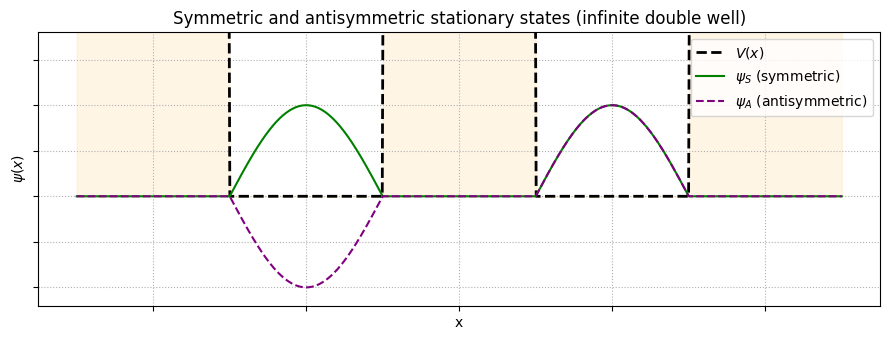

In [ ]:
# --- Image 3 ---
# Re-calculate infinite localized states
phi_L = np.zeros_like(x)
mask_L = (x >= x_L_start) & (x <= x_L_end)
phi_L[mask_L] = np.sqrt(2.0/a) * np.sin(np.pi * (x[mask_L] - x_L_start) / a)

phi_R = np.zeros_like(x)
mask_R = (x >= x_R_start) & (x <= x_R_end)
phi_R[mask_R] = np.sqrt(2.0/a) * np.sin(np.pi * (x[mask_R] - x_R_start) / a)

# Construct Symmetric/Antisymmetric
psi_S = (phi_R + phi_L) / np.sqrt(2.0)
psi_A = (phi_R - phi_L) / np.sqrt(2.0)

# Potential Visual
V_inf_plot = get_potential_profile(x, kind='infinite', v_height=1.5)

plt.figure(figsize=(9,3.5))

# Plot Potential
plt.plot(x, V_inf_plot, color=color_potential, linestyle='--', linewidth=2, label='$V(x)$')
plt.fill_between(x, V_inf_plot, color=color_barrier, alpha=0.1)

# Plot Wavefunctions
plt.plot(x, psi_S, label=r'$\psi_S$ (symmetric)', color=color_symmetric)
plt.plot(x, psi_A, label=r'$\psi_A$ (antisymmetric)', color=color_antisymmetric, linestyle='--')

plt.title('Symmetric and antisymmetric stationary states (infinite double well)')
plt.xlabel('x')
plt.ylabel('$\\psi(x)$')
plt.ylim(-1.2, 1.8) # Adjusted for potential visual
plt.legend(loc='upper right')
plt.grid(True, linestyle=':')
plt.tick_params(
    axis='both',
    which='both',
    bottom=True,
    left=True,
    labelbottom=False,
    labelleft=False
)
plt.tight_layout()
plt.show()

In [ ]:
plt.savefig('Image_3.png', dpi=300)

<Figure size 640x480 with 0 Axes>

## Image 4

In [ ]:
# Definition of "constants" k and K for illustration
# For an infinite well, k_1 = pi/a.
# For a FINITE well, k must be < pi/a to allow the function to "leak".
k_approx = 0.85 * np.pi / a # We choose k < pi/a
K_approx = 3.0           # K for the barrier, making the exponential decay

In [ ]:
# Idealized wave functions (n=1 for illustration)
def psi_symmetric(x_vals):
    psi = np.zeros_like(x_vals, dtype=float)

    # Left Well (Symmetric, A=B)
    mask_L = (x_vals > x_L_start) & (x_vals < x_L_end)
    psi[mask_L] = np.sin(k_approx * (x_vals[mask_L] - x_L_start))

    # Barrier (Symmetric, C=D -> cosh)
    mask_barrier = (x_vals >= x_barrier_start) & (x_vals <= x_barrier_end)
    # Visual matching
    cosh_amplitude = np.sin(k_approx * a) / np.cosh(K_approx * x_barrier_start)
    psi[mask_barrier] = cosh_amplitude * np.cosh(K_approx * x_vals[mask_barrier])

    # Right Well (Symmetric, A=B)
    mask_R = (x_vals > x_R_start) & (x_vals < x_R_end)
    psi[mask_R] = np.sin(k_approx * (x_R_end - x_vals[mask_R])) # Reversed for symmetry of the R well

    return psi / np.sqrt(np.trapz(psi**2, x_vals)) # Approximate normalization

def psi_antisymmetric(x_vals):
    psi = np.zeros_like(x_vals, dtype=float)

    # Left Well (Antisymmetric, B=-A)
    mask_L = (x_vals > x_L_start) & (x_vals < x_L_end)
    psi[mask_L] = -np.sin(k_approx * (x_vals[mask_L] - x_L_start)) # Negative for antisymmetry

    # Barrier (Antisymmetric, C=-D -> sinh)
    mask_barrier = (x_vals >= x_barrier_start) & (x_vals <= x_barrier_end)
    # Visual matching
    sinh_amplitude = -np.sin(k_approx * a) / np.sinh(K_approx * x_barrier_start)
    psi[mask_barrier] = sinh_amplitude * np.sinh(K_approx * x_vals[mask_barrier])

    # Right Well (Antisymmetric, B=-A)
    mask_R = (x_vals > x_R_start) & (x_vals < x_R_end)
    psi[mask_R] = np.sin(k_approx * (x_R_end - x_vals[mask_R]))

    return psi / np.sqrt(np.trapz(psi**2, x_vals)) # Approximate normalization

/tmp/ipython-input-1449058048.py:19: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return psi / np.sqrt(np.trapz(psi**2, x_vals)) # Approximate normalization
/tmp/ipython-input-1449058048.py:38: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return psi / np.sqrt(np.trapz(psi**2, x_vals)) # Approximate normalization


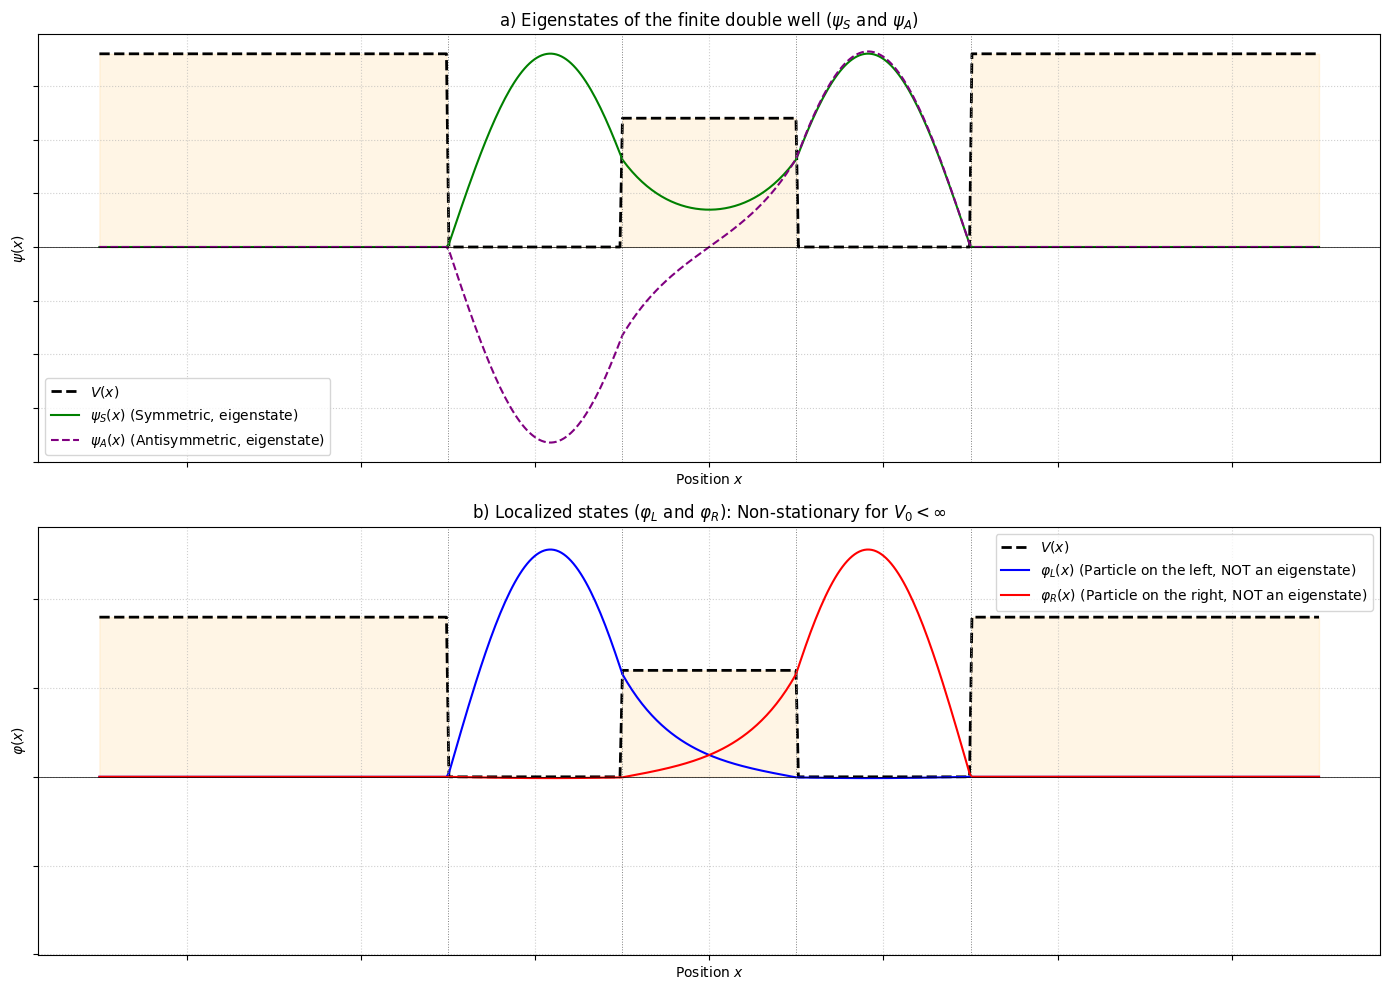

In [ ]:
# x space for the plot
x = np.linspace(-3.5, 3.5, 500)

# Calculation of eigenstates (stationary)
psi_S = psi_symmetric(x)
psi_A = psi_antisymmetric(x)

# Calculation of localized states (non-stationary)
phi_L = (psi_S - psi_A) / np.sqrt(2)
phi_R = (psi_S + psi_A) / np.sqrt(2)

# Potential Profile (Visual)
V_finite = get_potential_profile(x, kind='finite', v_height=V0)
V_plot_scaled = V_finite / 20.0

# --- Plotting ---
plt.figure(figsize=(14, 10))

# Plot psi_S and psi_A
plt.subplot(2, 1, 1)
plt.plot(x, V_plot_scaled, color='black', linestyle='--', linewidth=2, label=r'$V(x)$')
plt.fill_between(x, V_plot_scaled, color=color_barrier, alpha=0.1)

plt.plot(x, psi_S, label=r'$\psi_S(x)$ (Symmetric, eigenstate)', color='green', linestyle='-')
plt.plot(x, psi_A, label=r'$\psi_A(x)$ (Antisymmetric, eigenstate)', color='purple', linestyle='--')

plt.axvline(x_L_start, color='gray', linestyle=':', linewidth=0.7)
plt.axvline(x_L_end, color='gray', linestyle=':', linewidth=0.7)
plt.axvline(x_R_start, color='gray', linestyle=':', linewidth=0.7)
plt.axvline(x_R_end, color='gray', linestyle=':', linewidth=0.7)
plt.axhline(0, color='black', linewidth=0.5)
plt.title(r'a) Eigenstates of the finite double well ($\psi_S$ and $\psi_A$)')
plt.xlabel('Position $x$')
plt.ylabel(r'$\psi(x)$')
plt.ylim(np.min(psi_A)*1.1, np.max(psi_S)*1.1) # Adjusting the y-limit
plt.tick_params(
    axis='both',
    which='both',
    bottom=True,
    left=True,
    labelbottom=False,
    labelleft=False
)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)

# Plot phi_L and phi_R
plt.subplot(2, 1, 2)
plt.plot(x, V_plot_scaled, color='black', linestyle='--', linewidth=2, label=r'$V(x)$')
plt.fill_between(x, V_plot_scaled, color=color_barrier, alpha=0.1)

plt.plot(x, phi_L, label=r'$\varphi_L(x)$ (Particle on the left, NOT an eigenstate)', color='blue')
plt.plot(x, phi_R, label=r'$\varphi_R(x)$ (Particle on the right, NOT an eigenstate)', color='red')
plt.axvline(x_L_start, color='gray', linestyle=':', linewidth=0.7)
plt.axvline(x_L_end, color='gray', linestyle=':', linewidth=0.7)
plt.axvline(x_R_start, color='gray', linestyle=':', linewidth=0.7)
plt.axvline(x_R_end, color='gray', linestyle=':', linewidth=0.7)
plt.axhline(0, color='black', linewidth=0.5)
plt.title(r'b) Localized states ($\varphi_L$ and $\varphi_R$): Non-stationary for $V_0 < \infty$')
plt.xlabel('Position $x$')
plt.ylabel(r'$\varphi(x)$')
plt.ylim(np.min(psi_A)*1.1, np.max(phi_L)*1.1) # Adjusting the y-limit
plt.tick_params(
    axis='both',
    which='both',
    bottom=True,
    left=True,
    labelbottom=False,
    labelleft=False
)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)

plt.tight_layout()
plt.show()

In [ ]:
plt.savefig('Image_4.png', dpi=300)

<Figure size 640x480 with 0 Axes>

## Image 5

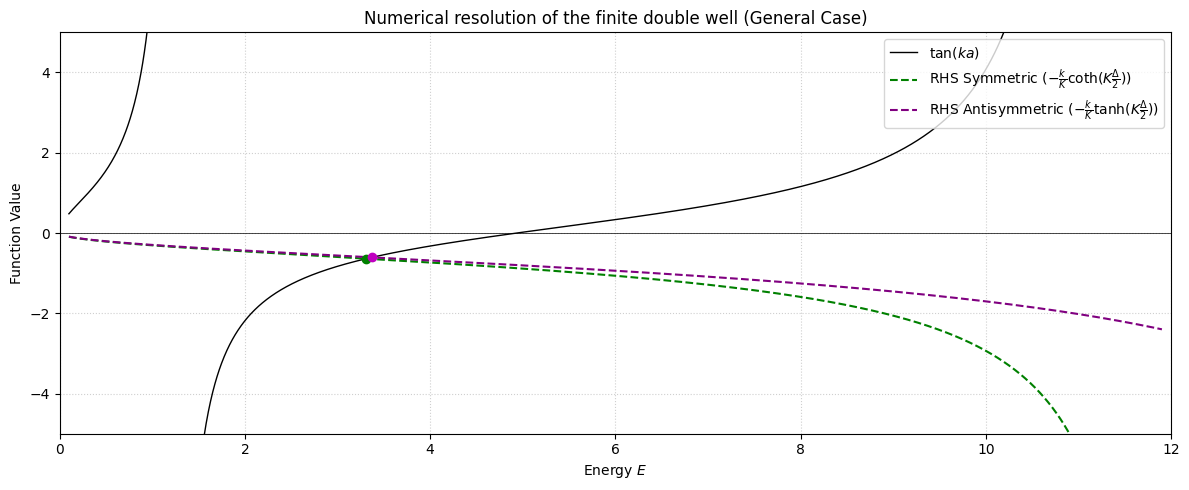

In [ ]:
# We solve: tan(ka) = -k/K * coth(K*Delta/2) (Symmetric)
#           tan(ka) = -k/K * tanh(K*Delta/2) (Antisymmetric)

# Energy range to scan (from 0 to near V0)
E = np.linspace(0.1, V0 - 0.1, 2000)

# Wave vectors
k = np.sqrt(2 * m * E) / hbar
K = np.sqrt(2 * m * (V0 - E)) / hbar

# Equations (LHS and RHS)
LHS = np.tan(k * a)
RHS_Sym = - (k / K) * (1 / np.tanh(K * Delta / 2)) # coth = 1/tanh
RHS_Anti = - (k / K) * np.tanh(K * Delta / 2)

# Clean up tan asymptotes for plotting
LHS[np.abs(LHS) > 10] = np.nan

plt.figure(figsize=(12, 5))
plt.title("Numerical resolution of the finite double well (General Case)")
plt.ylim(-5, 5)
plt.xlim(0, V0)

# Plot curves
plt.plot(E, LHS, label=r'$\tan(ka)$', color='black', linewidth=1)
plt.plot(E, RHS_Sym, label=r'RHS Symmetric ($-\frac{k}{K} \coth(K\frac{\Delta}{2})$)', color='green', linestyle='--')
plt.plot(E, RHS_Anti, label=r'RHS Antisymmetric ($-\frac{k}{K} \tanh(K\frac{\Delta}{2})$)', color='purple', linestyle='--')

# Add grid and labels
plt.xlabel('Energy $E$')
plt.ylabel('Function Value')
plt.axhline(0, color='black', linewidth=0.5)
plt.legend(loc='upper right')
plt.grid(True, linestyle=':', alpha=0.6)

# Identify intersections (approximate) for visualization
# We look for sign changes in (LHS - RHS)
diff_S = LHS - RHS_Sym
diff_A = LHS - RHS_Anti
# Simple logic to place dots at intersections
for i in range(len(E)-1):
    if np.sign(diff_S[i]) != np.sign(diff_S[i+1]) and np.abs(diff_S[i]) < 10:
        plt.plot(E[i], LHS[i], 'go') # Green dot for Symmetric
    if np.sign(diff_A[i]) != np.sign(diff_A[i+1]) and np.abs(diff_A[i]) < 10:
        plt.plot(E[i], LHS[i], 'mo') # Purple dot for Antisymmetric

plt.tight_layout()
plt.savefig('Image_5_Numerical_Solve.png')
plt.show()

In [ ]:
import numpy as np
from scipy.optimize import brentq

# --- Parameters ---
hbar = 1.0
m = 1.0
a = 1.0
b = 1.5
V0 = 50.0
Delta = 2 * b - a

# --- Functions to solve ---
# Symmetric: tan(ka) = - k/K * coth(K*Delta/2)
# => f_S(E) = tan(ka) + k/K * coth(K*Delta/2) = 0
def func_S(E):
    if E <= 0 or E >= V0: return np.nan
    k = np.sqrt(2 * m * E) / hbar
    K = np.sqrt(2 * m * (V0 - E)) / hbar
    return np.tan(k * a) + (k / K) * (1 / np.tanh(K * Delta / 2))

# Antisymmetric: tan(ka) = - k/K * tanh(K*Delta/2)
# => f_A(E) = tan(ka) + k/K * tanh(K*Delta/2) = 0
def func_A(E):
    if E <= 0 or E >= V0: return np.nan
    k = np.sqrt(2 * m * E) / hbar
    K = np.sqrt(2 * m * (V0 - E)) / hbar
    return np.tan(k * a) + (k / K) * np.tanh(K * Delta / 2)

# --- Finding Roots ---
energies = np.linspace(0.1, V0 - 0.1, 2000)
roots_S = []
roots_A = []

# We scan the array for sign changes
# We also need to check we aren't crossing an asymptote of tan(ka)
# An asymptote happens when tan(ka) jumps from +inf to -inf.
# The functions f_S and f_A will jump from +large to -large (or vice versa).
# A root is a smooth crossing of zero.

for i in range(len(energies) - 1):
    E1 = energies[i]
    E2 = energies[i+1]

    # Check Symmetric
    y1_S = func_S(E1)
    y2_S = func_S(E2)
    if np.sign(y1_S) != np.sign(y2_S):
        # Check if it's likely an asymptote (large values)
        if np.abs(y1_S) < 50 and np.abs(y2_S) < 50:
            try:
                root = brentq(func_S, E1, E2)
                roots_S.append(root)
            except:
                pass # Bracket might be invalid due to numerical noise near asymptote

    # Check Antisymmetric
    y1_A = func_A(E1)
    y2_A = func_A(E2)
    if np.sign(y1_A) != np.sign(y2_A):
        if np.abs(y1_A) < 50 and np.abs(y2_A) < 50:
            try:
                root = brentq(func_A, E1, E2)
                roots_A.append(root)
            except:
                pass

print("Numerical Solutions found (Energy Levels):")
print("-" * 40)
print(f"{'Level (n)':<10} | {'E_Symmetric':<15} | {'E_Antisymmetric':<15} | {'Splitting (dE)':<15}")
print("-" * 40)

# Pair them up (assuming they appear in pairs n=1, n=2...)
# The number of roots should typically match or be close
max_n = max(len(roots_S), len(roots_A))
for i in range(max_n):
    e_s = roots_S[i] if i < len(roots_S) else None
    e_a = roots_A[i] if i < len(roots_A) else None

    s_str = f"{e_s:.4f}" if e_s is not None else "---"
    a_str = f"{e_a:.4f}" if e_a is not None else "---"

    diff_str = "---"
    if e_s is not None and e_a is not None:
        diff_str = f"{e_a - e_s:.6f}"

    print(f"{i+1:<10} | {s_str:<15} | {a_str:<15} | {diff_str:<15}")

Numerical Solutions found (Energy Levels):
----------------------------------------
Level (n)  | E_Symmetric     | E_Antisymmetric | Splitting (dE) 
----------------------------------------
1          | 4.0679          | 4.0679          | 0.000000       
2          | 16.1267         | 16.1267         | 0.000001       
3          | 35.4750         | 35.4753         | 0.000269       


## Image 6

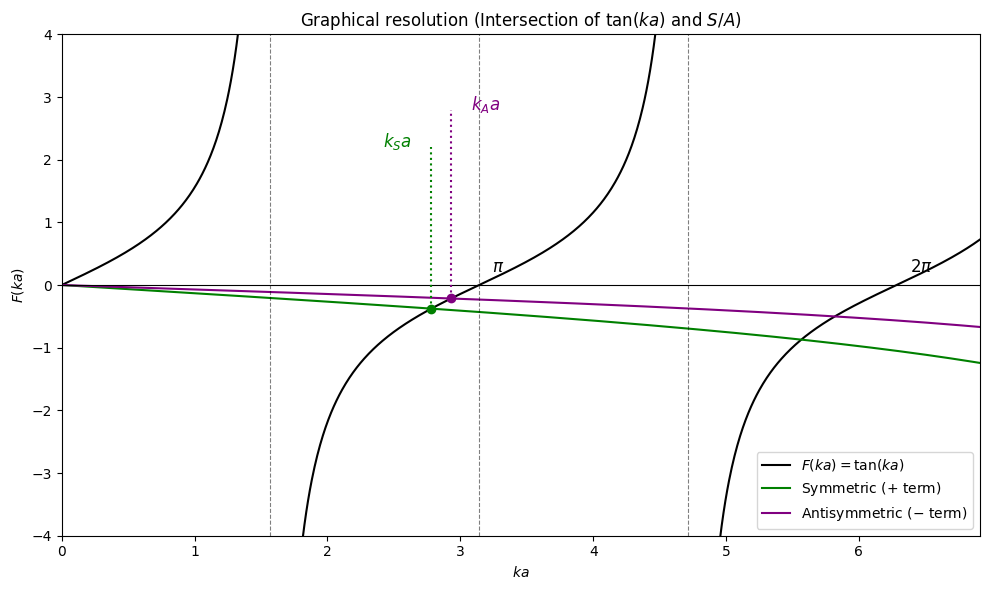

In [ ]:
# Modeled after the provided reference image (tan(ka) vs intersecting lines)
# Equation: tan(ka) = -k/K * (1 +/- 2*exp(-K*Delta))

fig, ax = plt.subplots(figsize=(10, 6))

# We plot against ka (dimensionless)
# ka range from 0 to 2pi (covering the first few states)
ka = np.linspace(0, 2.2 * np.pi, 1000)

# Constants for the simplified graphical representation
# Let P = sqrt(2mV0)*a/hbar be the "strength" of the well.
P = 10.0
# K*a = sqrt(P^2 - (ka)^2)
# We mask values where ka > P (energy > V0)
valid_mask = ka < P
ka_valid = ka[valid_mask]
Ka_valid = np.sqrt(P**2 - ka_valid**2)

# The scaling factor -k/K
# Note: In the simplified model for the reference image, we assume we are looking
# at the odd-parity-like solutions near pi where tan(ka) intersects negative slopes.
prefactor = -ka_valid / Ka_valid

# Small epsilon for the splitting term (2*exp(-K*Delta))
epsilon = 0.3

# LHS: F(ka) = tan(ka)
F_ka = np.tan(ka)
F_ka[np.abs(F_ka) > 10] = np.nan # Remove asymptotes for cleaner plotting

# RHS Curves (Linearized approximations near intersections)
# Symmetric (Green in reference): (1 + epsilon) -> More negative slope
RHS_S_approx = prefactor * (1 + epsilon)
# Antisymmetric (Purple in reference): (1 - epsilon) -> Less negative slope
RHS_A_approx = prefactor * (1 - epsilon)

# Plotting
ax.plot(ka, F_ka, color='black', label=r'$F(ka) = \tan(ka)$')
ax.plot(ka_valid, RHS_S_approx, color='green', label=r'Symmetric ($+$ term)')
ax.plot(ka_valid, RHS_A_approx, color='purple', label=r'Antisymmetric ($-$ term)')

# Formatting
ax.set_ylim(-4, 4)
ax.set_xlim(0, 2.2*np.pi)
ax.axhline(0, color='black', linewidth=0.8)
ax.axvline(np.pi, color='black', linestyle='--', linewidth=0.8, alpha=0.5)
ax.axvline(np.pi/2, color='black', linestyle='--', linewidth=0.8, alpha=0.5)
ax.axvline(3*np.pi/2, color='black', linestyle='--', linewidth=0.8, alpha=0.5)

# --- Annotations and Dots ---

# We focus on the region near pi where the split occurs
idx_search = (ka_valid > 2.5) & (ka_valid < 3.5)
ka_search = ka_valid[idx_search]
tan_search = F_ka[idx_search]
S_search = RHS_S_approx[idx_search]
A_search = RHS_A_approx[idx_search]

# Find closest intersections
idx_S = np.argmin(np.abs(tan_search - S_search))
idx_A = np.argmin(np.abs(tan_search - A_search))

kSa = ka_search[idx_S]
kAa = ka_search[idx_A]
ySa = tan_search[idx_S]
yAa = tan_search[idx_A]

# 1. Draw vertical indicator lines (up to the labels)
ax.vlines(kSa, ySa, 2.2, color='green', linestyle=':', linewidth=1.5)
ax.vlines(kAa, yAa, 2.8, color='purple', linestyle=':', linewidth=1.5)

# 2. Place Dots at intersections
ax.plot(kSa, ySa, 'o', color='green', markersize=6, zorder=5)
ax.plot(kAa, yAa, 'o', color='purple', markersize=6, zorder=5)

# 3. Add Text Labels (Staggered to avoid overlap)
# Shift kS_a slightly left and down
ax.text(kSa - 0.15, 2.2, r'$k_S a$', horizontalalignment='right', color='green', fontsize=12, fontweight='bold')
# Shift kA_a slightly right and up
ax.text(kAa + 0.15, 2.8, r'$k_A a$', horizontalalignment='left', color='purple', fontsize=12, fontweight='bold')

# Axis labels
ax.text(np.pi + 0.1, 0.2, r'$\pi$', fontsize=12)
ax.text(2*np.pi + 0.1, 0.2, r'$2\pi$', fontsize=12)

ax.set_xlabel(r'$ka$')
ax.set_ylabel(r'$F(ka)$')
ax.set_title(r'Graphical resolution (Intersection of $\tan(ka)$ and $S/A$)')
ax.legend(loc='lower right')

plt.tight_layout()
plt.savefig('Image_6_Graphical_Solve.png')
plt.show()

## Image 8

In [ ]:
# Definition of "constants" k and K for illustration
k_approx = np.pi / a
K_approx = 3.0

<>:31: SyntaxWarning: invalid escape sequence '\P'
<>:34: SyntaxWarning: invalid escape sequence '\P'
<>:31: SyntaxWarning: invalid escape sequence '\P'
<>:34: SyntaxWarning: invalid escape sequence '\P'
/tmp/ipython-input-1606726592.py:31: SyntaxWarning: invalid escape sequence '\P'
  line, = ax.plot(x, np.abs(phi_0)**2, color='blue', label='$|\Phi(x,t)|^2$')
/tmp/ipython-input-1606726592.py:34: SyntaxWarning: invalid escape sequence '\P'
  ax.set_ylabel('Probability $|\Phi(x,t)|^2$')
/tmp/ipython-input-1449058048.py:19: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return psi / np.sqrt(np.trapz(psi**2, x_vals)) # Approximate normalization
/tmp/ipython-input-1449058048.py:38: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return psi / np.sqrt(np.trapz(psi**2, x_vals)) # Approximate normalization


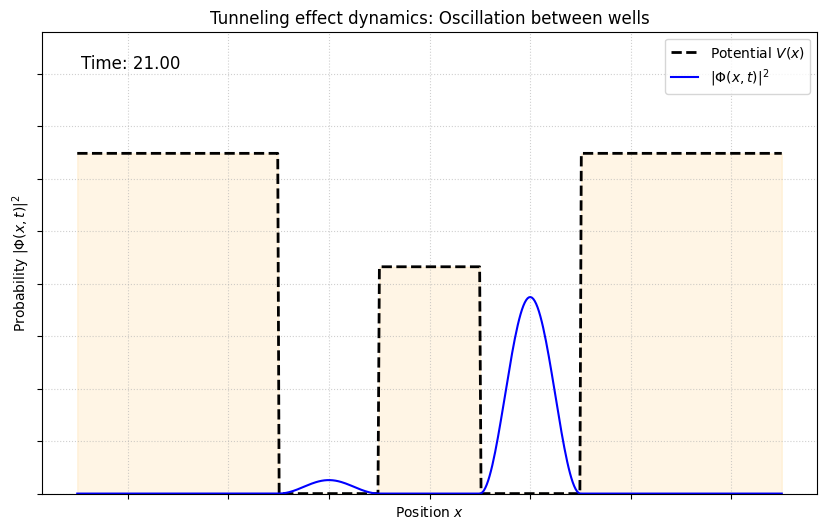

In [ ]:
# Calculation of eigenstates (stationary)
psi_S = psi_symmetric(x)
psi_A = psi_antisymmetric(x)

# --- Time evolution parameters ---
# E_S and E_A must be slightly different to show the oscillation.
# For illustration, we will just choose an arbitrary difference.
E_S = 1.0 # Energy of the symmetric state (arbitrary)
E_A = 1.2 # Energy of the antisymmetric state (arbitrary), E_A > E_S
hbar_val = 1.0 # Simplify hbar for the animation to 1.0 for "visual" units

# Oscillation (inversion) frequency
omega_tunneling = (E_A - E_S) / hbar_val

# Initial state (localized on the left)
phi_0 = (psi_S - psi_A) / np.sqrt(2) # Corresponds to phi_L

V0 = 12.0
# Potential for background
V_finite = get_potential_profile(x, kind='finite', v_height=V0)
scale_factor = 0.09
V_vis = V_finite * scale_factor# Scale V for visual fit (e.g. max probability height)

# --- Function for the animation ---
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Potential (Static Background)
ax.plot(x, V_vis, color='black', linestyle='--', linewidth=2, label='Potential $V(x)$')
ax.fill_between(x, V_vis, color='orange', alpha=0.1)

line, = ax.plot(x, np.abs(phi_0)**2, color='blue', label='$|\Phi(x,t)|^2$')
ax.set_title('Tunneling effect dynamics: Oscillation between wells')
ax.set_xlabel('Position $x$')
ax.set_ylabel('Probability $|\Phi(x,t)|^2$')
ax.set_ylim(0, np.max(np.abs(phi_0)**2) * 1.1)
# ax.axvspan(x_L_start, x_L_end, alpha=0.1, label='Left Well')
# ax.axvspan(x_R_start, x_R_end, alpha=0.1, label='Right Well')
# ax.axvspan(x_barrier_start, x_barrier_end, color='orange', alpha=0.1, label='Central barrier')
ax.legend()
ax.grid(True, linestyle=':', alpha=0.6)
plt.tick_params(
    axis='both',
    which='both',
    bottom=True,
    left=True,
    labelbottom=False,
    labelleft=False
)

time_text = ax.text(0.05, 0.95, '', transform=ax.transAxes, fontsize=12, verticalalignment='top')

def animate(frame):
    t = frame * (np.pi / omega_tunneling / 50) # Normalized time for a full cycle in 50 frames

    # Time evolution of the initial state phi_0 (which is a combination of psi_S and psi_A)
    # Phi(x,t) = (1/sqrt(2)) * (psi_S * e^(-i E_S t / hbar) - psi_A * e^(-i E_A t / hbar))
    # We want the probability density |Phi(x,t)|^2
    # |Phi(x,t)|^2 = (1/2) * ( |psi_S|^2 + |psi_A|^2 - 2 * Re[psi_S*psi_A*e^(-i(E_S-E_A)t/hbar)] )
    # For simplification, we can show that (1/2) * (|psi_S|^2 + |psi_A|^2) is just constant
    # and the oscillating term is -2 * Re[psi_S*psi_A*e^(i omega_tunneling * t)]

    # Simpler variant to implement for visualization:
    # Let's rewrite Phi(x,t) = exp(-i(ES+EA)t/2hbar) * (1/sqrt(2)) * (psi_S * exp(i omega_tunneling*t/2) - psi_A * exp(-i omega_tunneling*t/2))
    # The probability density is |Phi(x,t)|^2, so the global phase term disappears.
    # We have: Phi(x,t) = (1/sqrt(2)) * (psi_S * cos(omega_tunneling*t/2) - psi_A * sin(omega_tunneling*t/2))
    # This is a common simplification to visualize the oscillation between wells.

    current_phi = (1/np.sqrt(2)) * (psi_S * np.cos(omega_tunneling * 21.0 / 2) - psi_A * np.sin(omega_tunneling * 21.0 / 2))

    line.set_ydata(np.abs(current_phi)**2)
    time_text.set_text(f'Time: {21.0:.2f}')
    return line, time_text

num_frames = 100 # Number of frames for the animation
ani = FuncAnimation(fig, animate, frames=num_frames, blit=True, interval=50) # interval in ms

# To save the animation as a GIF, you will need `imagemagick` or `ffmpeg`
# on your system and to install `Pillow` for matplotlib if it's not already done.
# For example, for Pillow: pip install Pillow

plt.show()

In [ ]:
ani.save('Image_8.gif', writer='pillow', fps=20)